In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('combined_data2.csv')
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

In [3]:
df['VALUE DATE']=pd.to_datetime(df['VALUE DATE'])
df['MATURITY DATE']=pd.to_datetime(df['MATURITY DATE'])
df['ISSUE DATE']=pd.to_datetime(df['ISSUE DATE'])

### removing outliers

In [4]:
df_new = df[np.abs(df['EVAL MID PRICE'] - df['EVAL MID PRICE'].mean()) <= (3 * df['EVAL MID PRICE'].std())]

## Feature Selection

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import train_test_split

In [6]:
X = df_new[['STOCK CODE','EVAL MID YIELD','COMPOSITE LIQUIDITY SCORE (T-1)','COUPON FREQUENCY','NEXT COUPON RATE','SECTOR','REMAINING_TENURE_INT']]
y = df_new['EVAL MID PRICE']

In [7]:
# turn sectors into 0 / 1
dum = pd.get_dummies(X['SECTOR'])
X = pd.concat([X,dum],axis=1)
X = X.drop('SECTOR',axis=1)

# give id to unique stock code
unique_code =X['STOCK CODE']
df = pd.DataFrame({'id': unique_code})
df = df.groupby('id').ngroup()
X = pd.concat([df,X],axis=1)



In [9]:
X.head(10)

,0,STOCK CODE,EVAL MID YIELD,COMPOSITE LIQUIDITY SCORE (T-1),COUPON FREQUENCY,NEXT COUPON RATE,REMAINING_TENURE_INT,ASSET-BACKED SECURITIES,CONSTRUCTION AND ENGINEERING,DIVERSIFIED HOLDINGS,FINANCIAL SERVICES,INDUSTRIAL PRODUCTS,INFRASTRUCTURES AND UTILITIES,MINING & PETROLEUM,PLANTATION AND AGRICULTURE,PROPERTY AND REAL ESTATE,PUBLIC FINANCE,TRADING & SERVICES
0,0,DI140013,3.581,0.0,2,5.06,6,0,1,0,0,0,0,0,0,0,0,0
1,0,DI140013,3.517,0.0,2,5.06,3,0,1,0,0,0,0,0,0,0,0,0
2,0,DI140013,3.429,0.0,2,5.06,3,0,1,0,0,0,0,0,0,0,0,0
3,0,DI140013,3.435,0.0,2,5.06,3,0,1,0,0,0,0,0,0,0,0,0
4,1,DJ140003,3.772,0.0,2,5.17,24,0,1,0,0,0,0,0,0,0,0,0
5,1,DJ140003,3.650,0.0,2,5.17,24,0,1,0,0,0,0,0,0,0,0,0
6,1,DJ140003,3.587,0.0,2,5.17,24,0,1,0,0,0,0,0,0,0,0,0
7,1,DJ140003,3.599,0.0,2,5.17,24,0,1,0,0,0,0,0,0,0,0,0
8,1,DJ140003,3.526,0.0,2,5.17,12,0,1,0,0,0,0,0,0,0,0,0
9,1,DJ140003,3.375,3.0,2,5.17,12,0,1,0,0,0,0,0,0,0,0,0


In [10]:
X.drop('STOCK CODE',axis = 1,inplace=True)

In [21]:
y.shape

(14018,)

### data ready for training

In [20]:
X.to_csv('input_data.csv')
y.to_csv('expected_price.csv')

In [12]:
pca = PCA()
ss = StandardScaler()
pca_X = pca.fit_transform(X)
final_X = ss.fit_transform(pca_X)

In [13]:
X_train, X_test,y_train,y_test = train_test_split(final_X,y,train_size=0.67)

## Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [15]:
model = Sequential()
input_units = X_train.shape[1]
hidden_units = input_units

# we only have 16 inputs, so i just adjust accordingly, not sure how to do it correctly
model.add(Dense(hidden_units,input_dim=input_units,activation='relu'))
model.add(Dense(8,input_dim=input_units,activation='relu'))
model.add(Dense(4,input_dim=input_units,activation='relu'))
model.add(Dense(1))



In [16]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.001)
model.compile(loss='mean_absolute_error',optimizer=adam)

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=None)

C:\Users\jowen\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
294/294 [==============================] - ETA: 0s - loss: 103.1011WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023BE458B5E0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBO

294/294 [==============================] - 0s 743us/step - loss: 1.2006 - val_loss: 1.1739
Epoch 62/100
294/294 [==============================] - 0s 712us/step - loss: 1.1897 - val_loss: 1.1459
Epoch 63/100
294/294 [==============================] - 0s 741us/step - loss: 1.1945 - val_loss: 1.2492
Epoch 64/100
294/294 [==============================] - 0s 720us/step - loss: 1.1884 - val_loss: 1.1776
Epoch 65/100
294/294 [==============================] - 0s 773us/step - loss: 1.2026 - val_loss: 1.1522
Epoch 66/100
294/294 [==============================] - 0s 783us/step - loss: 1.1970 - val_loss: 1.2888
Epoch 67/100
294/294 [==============================] - 0s 743us/step - loss: 1.1916 - val_loss: 1.1575
Epoch 68/100
294/294 [==============================] - 0s 728us/step - loss: 1.1845 - val_loss: 1.1658
Epoch 69/100
294/294 [==============================] - 0s 728us/step - loss: 1.1964 - val_loss: 1.1536
Epoch 70/100
294/294 [==============================] - 0s 772us/step - loss:

Text(0.5, 0, 'Epoch')

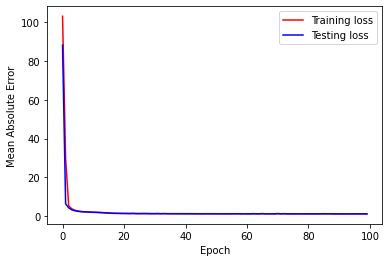

In [17]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss,'r')
plt.plot(test_loss,'b')
plt.legend(['Training loss','Testing loss'])
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')

In [19]:
RNNpredict_test=model.predict(X_test)
RNNpredict_train = model.predict(X_train)

from sklearn.metrics import mean_absolute_error

# The lower the mean_absolute_error for a given model, 
#the more closely the model is able to predict the actual values

RNN_test_score = mean_absolute_error(y_test,RNNpredict_test)
RNN_train_score = mean_absolute_error(y_train,RNNpredict_train)

print(RNN_test_score)
print(RNN_train_score)

1.1241364814438346
1.1278259776438724


## LSTM